In [60]:
# Import dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time

from api_key import api_key

In [61]:
# Import data and creat DataFrame
file_path = 'Resources/fastfood.csv'
fast_food_df = pd.read_csv(file_path)

fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [62]:
# CLEAN DATA
# Update the 'salad' column to True if the substring 'salad' exists in the 'item' column
fast_food_df['salad'] = fast_food_df['item'].str.contains("salad", case=False)

# Drop kids menu items - dropped 4 items 
kids_index = fast_food_df[fast_food_df['item'].str.contains("kids", case=False)].index
fast_food_df = fast_food_df.drop(kids_index)

# Drop 'vit_a', 'vit_c', 'calcium' columns
fast_food_df = fast_food_df[['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'salad']]

fast_food_df = fast_food_df.reset_index(drop=True)
fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False


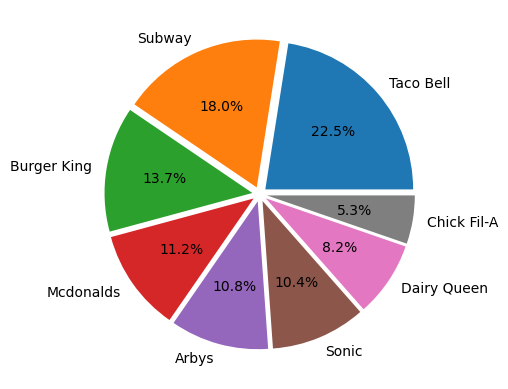

<Figure size 640x480 with 0 Axes>

In [56]:
# Pie Chart of restaurant distribution in cleaned data set

# Set pie chart arguments
x = fast_food_df['restaurant'].value_counts()
labels = x.index
explode = [.05 for _ in range(len(x))]

# Create pie chart
plt.pie(x, labels=labels, explode=explode, autopct='%.1f%%')
plt.show()

# Export image
plt.savefig('Resources/restaurant_pie.png')

In [6]:
# List and organize into desired columns 
fast_food_df_sorted = fast_food_df[["restaurant", "item","calories", "total_fat", "sugar","sodium","protein"]]
fast_food_df_sorted.head()

,restaurant,item,calories,total_fat,sugar,sodium,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,11,1110,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,18,1580,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,18,1920,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,18,1940,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,18,1980,46.0


In [7]:
# Group by Restaurant Minimums
fast_food_df_mins = fast_food_df_sorted.groupby('restaurant').min()
fast_food_df_mins

,item,calories,total_fat,sugar,sodium,protein
restaurant,,,,,,
Arbys,2 piece Prime-Cut Chicken Tenders,70,5,0,100,5.0
Burger King,20 Piece Chicken Nuggets,190,10,0,310,5.0
Chick Fil-A,1 Piece Chick-n-Strips,70,2,0,220,11.0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,20,0,0,15,1.0
Mcdonalds,10 Piece Chicken McNuggets,140,5,0,20,7.0
Sonic,3 Piece Crispy Chicken Tender Dinner,100,11,0,470,6.0
Subway,"6"" B.L.T.",50,1,3,65,3.0
Taco Bell,1/2 lb.* Cheesy Potato Burrito,140,4,1,290,6.0


In [8]:
# Group by Restaurant Maximums
fast_food_df_max = fast_food_df_sorted.groupby('restaurant').max()
fast_food_df_max

,item,calories,total_fat,sugar,sodium,protein
restaurant,,,,,,
Arbys,Ultimate BLT,1030,59,23,3350,62.0
Burger King,WHOPPER w/o Cheese,1550,126,37,2310,134.0
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,970,47,12,3660,103.0
Dairy Queen,Turkey BLT Sandwich,1260,75,30,3500,49.0
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,2430,141,87,6080,186.0
Sonic,Veggie Burger With Mustard,1350,100,17,4520,67.0
Subway,Veggie Delite Salad,1160,62,36,3540,78.0
Taco Bell,XXL Grilled Stuft Burrito - Steak,880,42,8,2260,37.0


In [9]:
# Sort restaurant's MAX CALORIES items
max_cal = fast_food_df_max.sort_values(by=['calories'])
max_cal = fast_food_df_max[['item','calories']]
max_cal

,item,calories
restaurant,,
Arbys,Ultimate BLT,1030
Burger King,WHOPPER w/o Cheese,1550
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,970
Dairy Queen,Turkey BLT Sandwich,1260
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,2430
Sonic,Veggie Burger With Mustard,1350
Subway,Veggie Delite Salad,1160
Taco Bell,XXL Grilled Stuft Burrito - Steak,880


In [10]:
# Sort restaurant's MAX SUGAR items
max_sug = fast_food_df_max.sort_values(by=['sugar'])
max_sug = fast_food_df_max[['item','sugar']]
max_sug

,item,sugar
restaurant,,
Arbys,Ultimate BLT,23
Burger King,WHOPPER w/o Cheese,37
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,12
Dairy Queen,Turkey BLT Sandwich,30
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,87
Sonic,Veggie Burger With Mustard,17
Subway,Veggie Delite Salad,36
Taco Bell,XXL Grilled Stuft Burrito - Steak,8


In [11]:
# Sort restaurant's MAX SODIUM items 
max_sod = fast_food_df_max.sort_values(by=['sodium'])
max_sod = fast_food_df_max[['item','sodium']]
max_sod

,item,sodium
restaurant,,
Arbys,Ultimate BLT,3350
Burger King,WHOPPER w/o Cheese,2310
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,3660
Dairy Queen,Turkey BLT Sandwich,3500
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,6080
Sonic,Veggie Burger With Mustard,4520
Subway,Veggie Delite Salad,3540
Taco Bell,XXL Grilled Stuft Burrito - Steak,2260


In [12]:
# Sort restaurant's MAX FAT items 
max_fat = fast_food_df_max.sort_values(by=['total_fat'])
max_fat = fast_food_df_max[['item','total_fat']]
max_fat

,item,total_fat
restaurant,,
Arbys,Ultimate BLT,59
Burger King,WHOPPER w/o Cheese,126
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,47
Dairy Queen,Turkey BLT Sandwich,75
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,141
Sonic,Veggie Burger With Mustard,100
Subway,Veggie Delite Salad,62
Taco Bell,XXL Grilled Stuft Burrito - Steak,42


In [13]:
# Sort restaurant's MAX PROTEIN items 
max_prot = fast_food_df_max.sort_values(by=['protein'])
max_prot = fast_food_df_max[['item','protein']]
max_prot

,item,protein
restaurant,,
Arbys,Ultimate BLT,62.0
Burger King,WHOPPER w/o Cheese,134.0
Chick Fil-A,Spicy Grilled Chicken Sub Sandwich,103.0
Dairy Queen,Turkey BLT Sandwich,49.0
Mcdonalds,Sweet BBQ Bacon 1/4 lb Burger,186.0
Sonic,Veggie Burger With Mustard,67.0
Subway,Veggie Delite Salad,78.0
Taco Bell,XXL Grilled Stuft Burrito - Steak,37.0


In [14]:
# Group by Restaurant Mins
fast_food_df_mins = fast_food_df_sorted.groupby('restaurant').min()
fast_food_df_mins

# Sort restaurant's MIN CALORIES items 
min_cal = fast_food_df_mins.sort_values(by=['calories'])
min_cal = fast_food_df_mins[['item','calories']]
min_cal

,item,calories
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,70
Burger King,20 Piece Chicken Nuggets,190
Chick Fil-A,1 Piece Chick-n-Strips,70
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,20
Mcdonalds,10 Piece Chicken McNuggets,140
Sonic,3 Piece Crispy Chicken Tender Dinner,100
Subway,"6"" B.L.T.",50
Taco Bell,1/2 lb.* Cheesy Potato Burrito,140


In [15]:
# Sort restaurant's MIN SUGAR items
min_sug = fast_food_df_mins.sort_values(by=['sugar'])
min_sug = fast_food_df_mins[['item','sugar']]
min_sug

,item,sugar
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,0
Burger King,20 Piece Chicken Nuggets,0
Chick Fil-A,1 Piece Chick-n-Strips,0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,0
Mcdonalds,10 Piece Chicken McNuggets,0
Sonic,3 Piece Crispy Chicken Tender Dinner,0
Subway,"6"" B.L.T.",3
Taco Bell,1/2 lb.* Cheesy Potato Burrito,1


In [16]:
# Sort restaurant's MIN SODIUM items
min_sod = fast_food_df_mins.sort_values(by=['sodium'])
min_sod = fast_food_df_mins[['item','sodium']]
min_sod

,item,sodium
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,100
Burger King,20 Piece Chicken Nuggets,310
Chick Fil-A,1 Piece Chick-n-Strips,220
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,15
Mcdonalds,10 Piece Chicken McNuggets,20
Sonic,3 Piece Crispy Chicken Tender Dinner,470
Subway,"6"" B.L.T.",65
Taco Bell,1/2 lb.* Cheesy Potato Burrito,290


In [17]:
# Sort restaurant's MIN FAT items
min_fat = fast_food_df_mins.sort_values(by=['total_fat'])
min_fat = fast_food_df_mins[['item','total_fat']]
min_fat

,item,total_fat
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,5
Burger King,20 Piece Chicken Nuggets,10
Chick Fil-A,1 Piece Chick-n-Strips,2
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,0
Mcdonalds,10 Piece Chicken McNuggets,5
Sonic,3 Piece Crispy Chicken Tender Dinner,11
Subway,"6"" B.L.T.",1
Taco Bell,1/2 lb.* Cheesy Potato Burrito,4


In [18]:
# Sort restaurant's MIN PROTEIN items
min_prot = fast_food_df_mins.sort_values(by=['protein'])
min_prot = fast_food_df_mins[['item','protein']]
min_prot

,item,protein
restaurant,,
Arbys,2 piece Prime-Cut Chicken Tenders,5.0
Burger King,20 Piece Chicken Nuggets,5.0
Chick Fil-A,1 Piece Chick-n-Strips,11.0
Dairy Queen,1/2 lb. FlameThrower® GrillBurger,1.0
Mcdonalds,10 Piece Chicken McNuggets,7.0
Sonic,3 Piece Crispy Chicken Tender Dinner,6.0
Subway,"6"" B.L.T.",3.0
Taco Bell,1/2 lb.* Cheesy Potato Burrito,6.0


In [19]:
# Sort categories into variables for scatterplot

fast_food_df_sorted
a = fast_food_df_sorted['total_fat']
b = fast_food_df_sorted['sugar']
c = fast_food_df_sorted['sodium']
d = fast_food_df_sorted['protein']

x = fast_food_df_sorted['calories']
r = fast_food_df_sorted['restaurant']

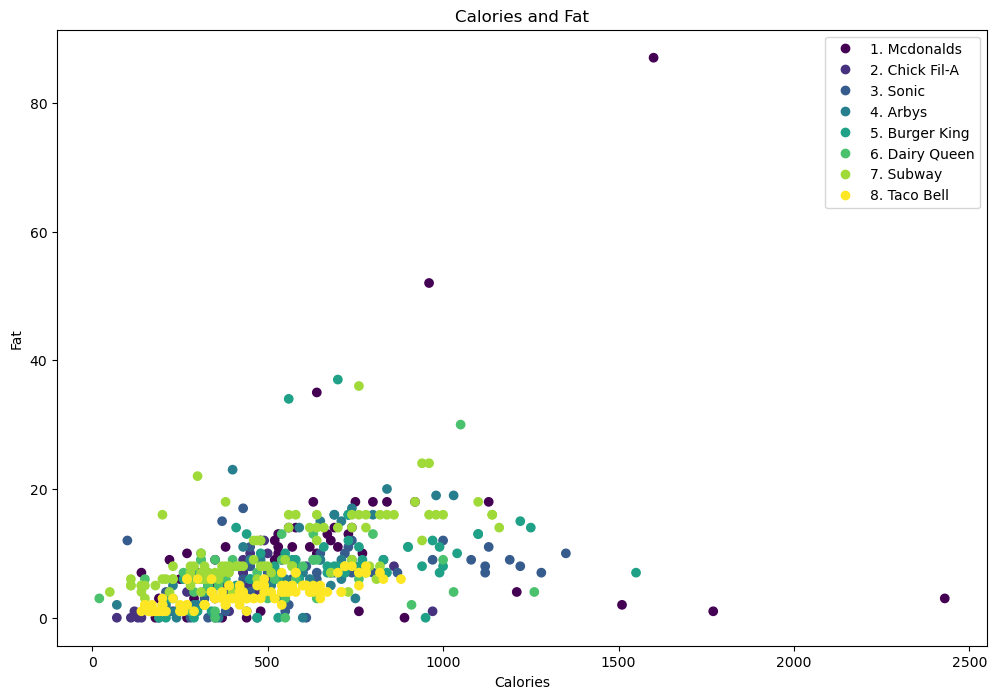

In [20]:
# Scatterplot - comparing calorie value to FAT (A) in grams
# Setting up

a = fast_food_df_sorted['total_fat']
fig, ax = plt.subplots(figsize=(12,8))
x_limit = 2500
y_limit = 150

# # Customizing the plot
plt.title("Calories and Fat")
plt.xlabel("Calories")
plt.ylabel("Fat")

# Create a legend
unique_restaurants = fast_food_df_sorted['restaurant'].unique()
legend_labels = [f"{i+1}. {restaurant}" for i, restaurant in enumerate(unique_restaurants)]
scatter = ax.scatter(x=x, y=b, c=pd.factorize(r)[0])
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

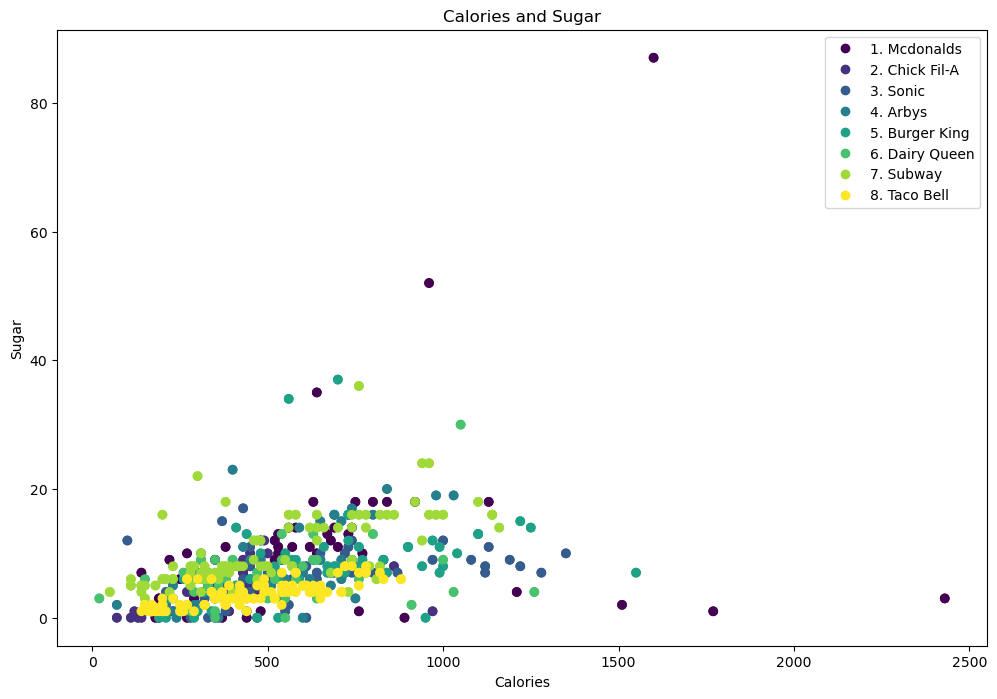

In [21]:
# Scatterplot - comparing calorie value to SUGAR(B) in grams
# Set up 
b = fast_food_df_sorted['sugar']
fig, ax = plt.subplots(figsize=(12,8))

x_limit = 2500
y_limit = 90

plt.scatter(x, b, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Sugar")
plt.xlabel("Calories")
plt.ylabel("Sugar")

# Create a legend
unique_restaurants = fast_food_df_sorted['restaurant'].unique()
legend_labels = [f"{i+1}. {restaurant}" for i, restaurant in enumerate(unique_restaurants)]
scatter = ax.scatter(x=x, y=b, c=pd.factorize(r)[0])
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

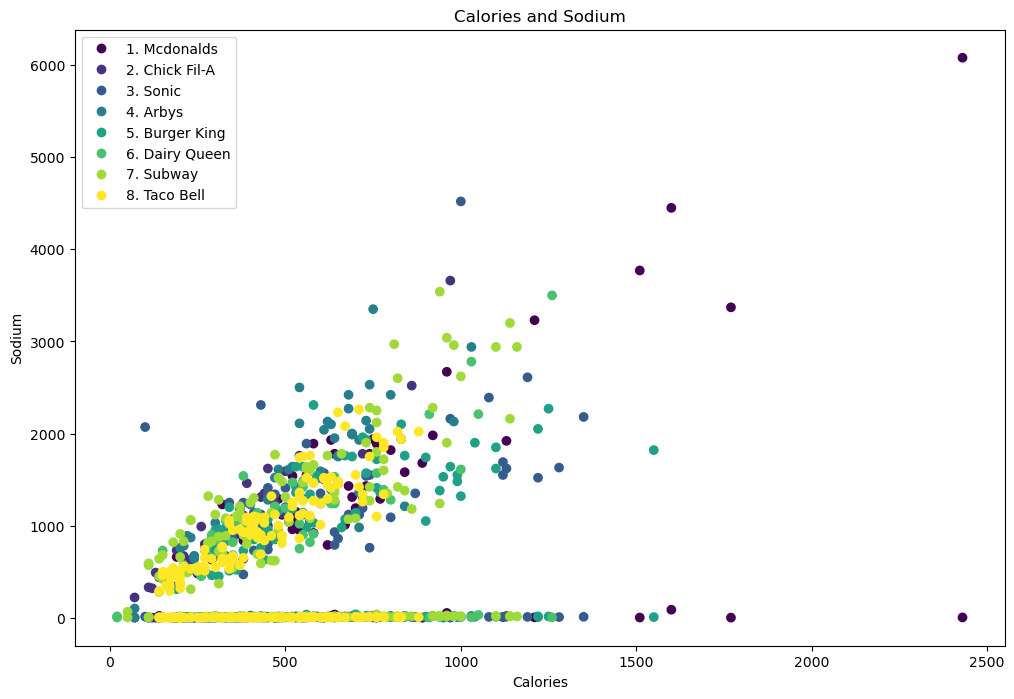

In [23]:
# Scatterplot - comparing calorie value to SODIUM(C) in grams
# Set up 
c = fast_food_df_sorted['sodium']
fig, ax = plt.subplots(figsize=(12,8))

x_limit = 2500
y_limit = 6100

plt.scatter(x, c, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Sodium")
plt.xlabel("Calories")
plt.ylabel("Sodium")

# Legend
unique_restaurants = fast_food_df_sorted['restaurant'].unique()
legend_labels = [f"{i+1}. {restaurant}" for i, restaurant in enumerate(unique_restaurants)]
scatter = ax.scatter(x=x, y=b, c=pd.factorize(r)[0])
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

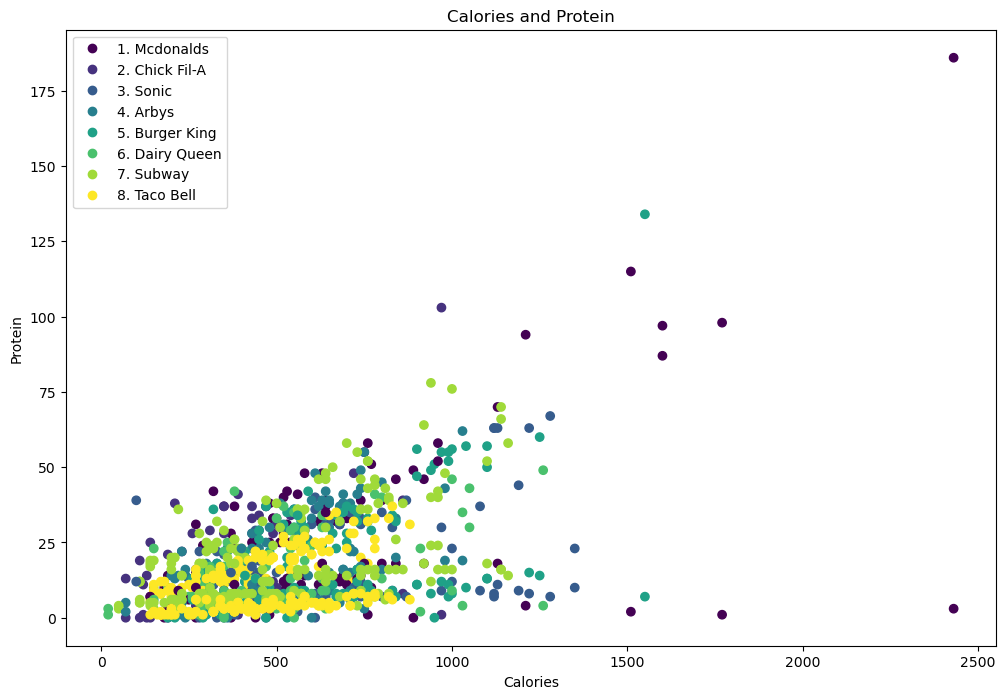

In [24]:
# Scatterplot - comparing calorie value to PROTEIN(C) in grams
# Set up 
d = fast_food_df_sorted['protein']
fig, ax = plt.subplots(figsize=(12,8))

x_limit = 2500
y_limit = 190

plt.scatter(x, d, c=pd.factorize(r)[0])

# # Customizing the plot
plt.title("Calories and Protein")
plt.xlabel("Calories")
plt.ylabel("Protein")

# Legend
unique_restaurants = fast_food_df_sorted['restaurant'].unique()
legend_labels = [f"{i+1}. {restaurant}" for i, restaurant in enumerate(unique_restaurants)]
scatter = ax.scatter(x=x, y=b, c=pd.factorize(r)[0])
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Show the plot
plt.show()

In [25]:
#suggested daily intake averages for females and males
average_intake_df = pd.DataFrame({'sex': ['female','male'],
                                  'calories': [1800, 2267],
                                  'total_fat': [46, 56],
                                  'sat_fat': [180, 227],
                                  'cholesterol': [200, 200],
                                  'sodium': [2300, 2300],
                                  'total_carb': [130, 130],
                                  'fiber': [25.2, 30.8],
                                  'sugar': [24, 36],
                                  'protein': [46, 56]})

average_intake_df 

# Set new index to sex
average_intake_df = average_intake_df .set_index("sex")
average_intake_df.head()

,calories,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
sex,,,,,,,,,
female,1800,46,180,200,2300,130,25.2,24,46
male,2267,56,227,200,2300,130,30.8,36,56


In [26]:
#suggested daily intake average for female and males per meal
average_meal_cal = average_intake_df['calories']/3
average_meal_fat = average_intake_df['total_fat']/3
average_meal_chol = average_intake_df['cholesterol']/3
average_meal_sod = average_intake_df['sodium']/3
average_meal_carb = average_intake_df['total_carb']/3
average_meal_fib = average_intake_df['fiber']/3
average_meal_sug = average_intake_df['sugar']/3
average_meal_prot = average_intake_df['protein']/3

#seperate calories by male and female
female_average_meal_cal = average_meal_cal.loc["female"]
male_average_meal_cal = average_meal_cal.loc["male"]

print(female_average_meal_cal)
print(male_average_meal_cal)

600.0
755.6666666666666


In [29]:
# Create a copy of original DataFrame
fast_food_bin_df = fast_food_df.copy()

# Create bins in which to place values based upon total calories per item
bins = [0, 249, 499, 749, 999, 1249, 1499, 1749, 1999, 2249, 2499]

# # Create labels for these bins
group_labels = ["0 to 249", "250 to 499", "500 to 749", "750 to 999", "1000 to 1249", "1250 to 1499",
                "1500 to 1749", "1750 to 1999", "2000 to 2249", "2250 to 2499"]

In [35]:
#creating calorie bins by groups of 250 calories
pd.cut(fast_food_bin_df["calories"], bins, labels=group_labels)

# Create a Count for the Number of Items Per Calorie Range as Well as Averages for Calories, Fat, Cholesterol, Sodium, Carbs, and Protein
fast_food_bin_df["calorie ranges"] = pd.cut(fast_food_bin_df["calories"], bins, labels=group_labels, include_lowest=True)
fast_food_bin_df.head()

# Create a GroupBy object based upon calorie ranges
calorie_groups = fast_food_bin_df.groupby('calorie ranges')


# Find how many rows fall into each bin
print(calorie_groups["calorie ranges"].count())

# Get the average of each of the first 5 rating columns within the GroupBy object
calorie_groups[["item", "calories", "total_fat", "cholesterol", "sodium", "total_carb", "protein"]].mean()

calorie ranges
0 to 249         64
250 to 499      196
500 to 749      160
750 to 999       59
1000 to 1249     23
1250 to 1499      4
1500 to 1749      3
1750 to 1999      1
2000 to 2249      0
2250 to 2499      1
Name: calorie ranges, dtype: int64


,calories,total_fat,cholesterol,sodium,total_carb,protein
calorie ranges,,,,,,
0 to 249,174.531250,9.093750,33.203125,538.593750,14.312500,13.234375
250 to 499,374.387755,17.224490,44.642857,920.102041,35.663265,19.535714
500 to 749,617.312500,30.356250,79.968750,1451.625000,54.900000,31.387500
750 to 999,848.813559,42.762712,108.559322,1886.949153,73.288136,42.728814
1000 to 1249,1100.434783,64.260870,185.217391,2312.608696,70.956522,56.727273
1250 to 1499,1285.000000,85.000000,200.000000,2395.000000,75.750000,49.750000
1500 to 1749,1553.333333,93.333333,455.000000,3346.666667,80.333333,115.333333
1750 to 1999,1770.000000,107.000000,295.000000,3370.000000,105.000000,98.000000
2000 to 2249,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#add a column for if item is over suggested cal meal intake for women
mask = fast_food_bin_df['calories']>female_average_meal_cal

fast_food_bin_df['Over Suggested Meal Calorie Intake for Females'] = mask
fast_food_bin_df.head()

over_under_cal_female = fast_food_bin_df.loc[:,"Over Suggested Meal Calorie Intake for Females"]
over_under_cal_female.value_counts()

False    336
True     175
Name: Over Suggested Meal Calorie Intake for Females, dtype: int64

In [33]:
#add a column for if item is over suggested cal meal intake for men
male_mask = fast_food_bin_df['calories']>male_average_meal_cal

fast_food_bin_df['Over Suggested Meal Calorie Intake for Males'] = male_mask
fast_food_bin_df.head()

over_under_cal_male = fast_food_bin_df.loc[:,"Over Suggested Meal Calorie Intake for Males"]
over_under_cal_male.value_counts()

False    422
True      89
Name: Over Suggested Meal Calorie Intake for Males, dtype: int64

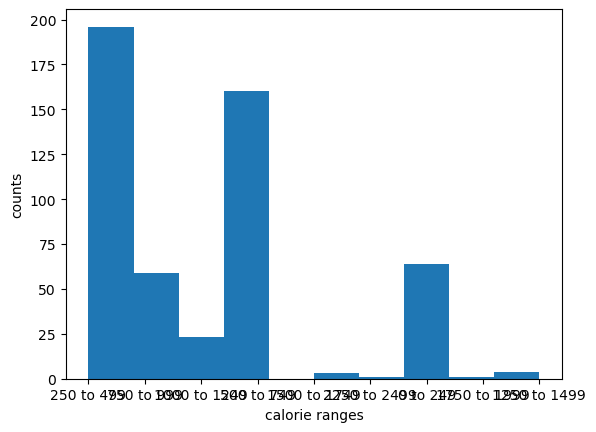

In [36]:
#hist of calorie ranges

plt.hist(fast_food_bin_df['calorie ranges'])
plt.xlabel('calorie ranges')
plt.ylabel('counts')
plt.show()

The correlation between both factors is 0.9


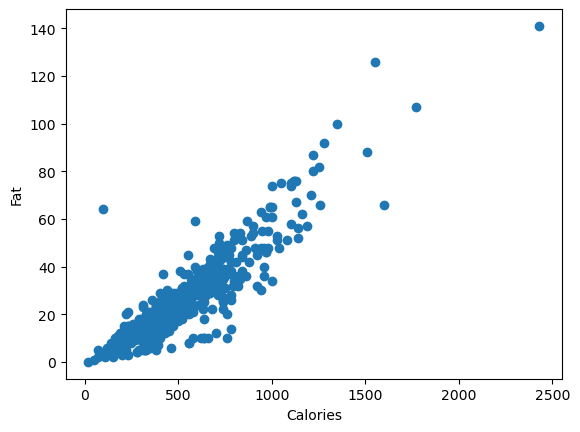

In [38]:
# #correlation coefficient between calories and fat

calories = fast_food_bin_df['calories']
fat = fast_food_bin_df['total_fat']
correlation = st.pearsonr(calories,fat)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and fat on a scatter
plt.scatter(calories,fat)
plt.xlabel('Calories')
plt.ylabel('Fat')

plt.show()

The correlation between both factors is 0.71


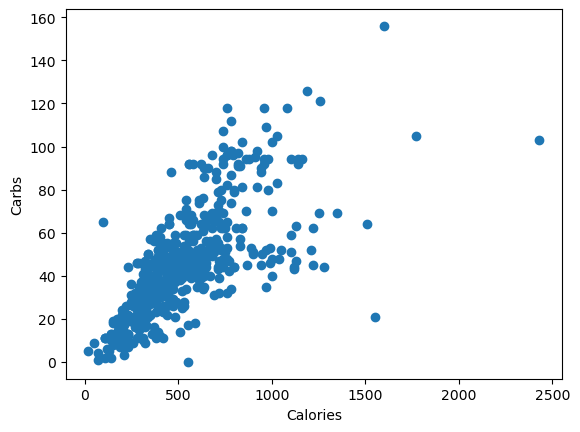

In [39]:
#correlation coefficient between calories and carbs

carbs = fast_food_bin_df['total_carb']

correlation = st.pearsonr(calories,carbs)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and carbs on a scatter
plt.scatter(calories,carbs)
plt.xlabel('Calories')
plt.ylabel('Carbs')

plt.show()

The correlation between both factors is 0.76


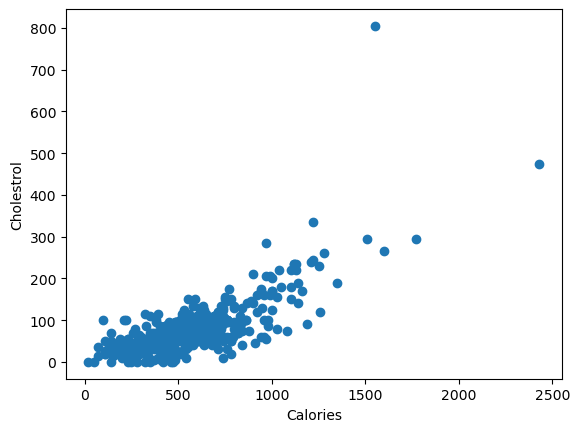

In [40]:
#correlation coefficient between calories and cholesterol
# chol = fast_food_bin_df.iloc[:,7]

chol = fast_food_bin_df['cholesterol']

correlation = st.pearsonr(calories,chol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#compare calories and carbs on a scatter
plt.scatter(calories,chol)
plt.xlabel('Calories')
plt.ylabel('Cholestrol')

plt.show()

In [41]:
#create a list of lower cal and higher protein options for males
low_cal_high_prot_male = fast_food_bin_df.loc[(fast_food_bin_df["calories"]<=male_average_meal_cal) & (fast_food_bin_df["protein"]>=30)]

#not sure that I need to set the index to rest.
# low_cal_high_prot_male = low_cal_high_prot_male.set_index('restaurant')

low_cal_high_prot_male = low_cal_high_prot_male.sort_values(by=['calories'])

#print how many options ther are total
print(low_cal_high_prot_male['item'].count())

#group and print how many options by rest.
low_cal_high_prot_male = low_cal_high_prot_male.groupby('restaurant')
print(low_cal_high_prot_male['restaurant'].count())


low_cal_high_prot_male.head()
#this is saying that across all of the restaurants there are 122 options for males that provide over 30g protein and are equal to or less than suggested meal calorie intake

122
restaurant
Arbys          23
Burger King    15
Chick Fil-A    11
Dairy Queen     9
Mcdonalds      23
Sonic          16
Subway         22
Taco Bell       3
Name: restaurant, dtype: int64


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,Over Suggested Meal Calorie Intake for Females,Over Suggested Meal Calorie Intake for Males,calorie ranges
127,Sonic,Ultimate Chicken Club,100,580,64,15.0,0.5,100,2070,65,4.0,12,39.0,False,False,False,0 to 249
75,Chick Fil-A,12 Piece Grilled Chicken Nuggets,210,45,5,1.0,0.0,100,670,3,0.0,1,38.0,False,False,False,0 to 249
374,Subway,Double Chicken Salad,220,35,5,1.5,0.0,100,490,10,4.0,4,36.0,True,False,False,0 to 249
49,Mcdonalds,Premium Asian Salad w/ Grilled Chicken,270,80,9,1.0,0.0,80,740,18,5.0,10,31.0,True,False,False,250 to 499
230,Burger King,Garden Grilled Chicken Salad w/ Grilled Chicke...,320,120,14,6.0,0.0,115,650,16,2.0,4,36.0,True,False,False,250 to 499
52,Mcdonalds,Premium Bacon Ranch Salad w/ Grilled Chicken,320,120,14,6.0,0.0,45,1230,9,3.0,4,42.0,True,False,False,250 to 499
367,Subway,Big Philly Cheesesteak Salad,330,140,16,8.0,1.0,85,1080,17,5.0,6,32.0,True,False,False,250 to 499
81,Chick Fil-A,Chargrilled Chicken Cool Wrap,350,126,14,5.0,0.0,60,960,29,15.0,3,37.0,False,False,False,250 to 499
55,Mcdonalds,Premium Southwest Salad w/ Grilled Chicken,350,100,12,4.5,0.0,110,1070,27,6.0,9,37.0,True,False,False,250 to 499
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,False,False,250 to 499


In [42]:
#create a list of lower cal and higher protein options for females
low_cal_high_prot_female = fast_food_bin_df.loc[(fast_food_bin_df["calories"]<=female_average_meal_cal) & (fast_food_bin_df["protein"]>=30)]


# low_cal_high_prot_female = low_cal_high_prot_female.set_index('restaurant')
low_cal_high_prot_female = low_cal_high_prot_female.sort_values(by=['calories'])

#print how many options ther are total
print(low_cal_high_prot_female['item'].count())

#group and print how many options by rest.

low_cal_high_prot_female = low_cal_high_prot_female.groupby('restaurant')
print(low_cal_high_prot_female['restaurant'].count())


low_cal_high_prot_female.head()


#this is saying that there are 57 options across the restaurants that are 30g or more protein and equal to or less than suggested meal calorie intake for females

57
restaurant
Arbys           6
Burger King     9
Chick Fil-A    10
Dairy Queen     5
Mcdonalds      12
Sonic           4
Subway         11
Name: restaurant, dtype: int64


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,Over Suggested Meal Calorie Intake for Females,Over Suggested Meal Calorie Intake for Males,calorie ranges
127,Sonic,Ultimate Chicken Club,100,580,64,15.0,0.5,100,2070,65,4.0,12,39.0,False,False,False,0 to 249
75,Chick Fil-A,12 Piece Grilled Chicken Nuggets,210,45,5,1.0,0.0,100,670,3,0.0,1,38.0,False,False,False,0 to 249
374,Subway,Double Chicken Salad,220,35,5,1.5,0.0,100,490,10,4.0,4,36.0,True,False,False,0 to 249
49,Mcdonalds,Premium Asian Salad w/ Grilled Chicken,270,80,9,1.0,0.0,80,740,18,5.0,10,31.0,True,False,False,250 to 499
230,Burger King,Garden Grilled Chicken Salad w/ Grilled Chicke...,320,120,14,6.0,0.0,115,650,16,2.0,4,36.0,True,False,False,250 to 499
52,Mcdonalds,Premium Bacon Ranch Salad w/ Grilled Chicken,320,120,14,6.0,0.0,45,1230,9,3.0,4,42.0,True,False,False,250 to 499
367,Subway,Big Philly Cheesesteak Salad,330,140,16,8.0,1.0,85,1080,17,5.0,6,32.0,True,False,False,250 to 499
81,Chick Fil-A,Chargrilled Chicken Cool Wrap,350,126,14,5.0,0.0,60,960,29,15.0,3,37.0,False,False,False,250 to 499
55,Mcdonalds,Premium Southwest Salad w/ Grilled Chicken,350,100,12,4.5,0.0,110,1070,27,6.0,9,37.0,True,False,False,250 to 499
298,Dairy Queen,Grilled Chicken BLT Salad,380,170,19,9.0,0.0,100,1540,11,3.0,6,42.0,True,False,False,250 to 499


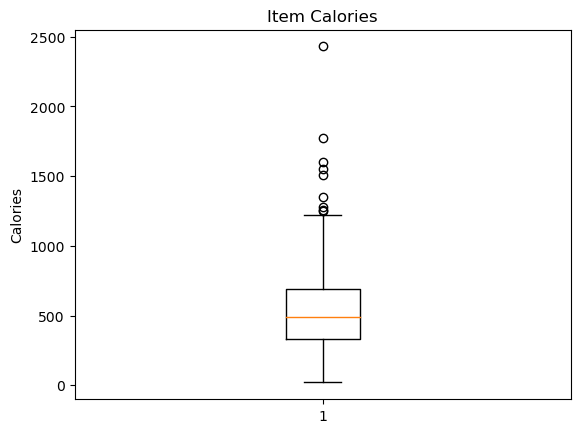

In [43]:
#looking at the calories of items
calorie_box = fast_food_bin_df['calories']

fig1, ax1 = plt.subplots()
ax1.set_title('Item Calories')
ax1.set_ylabel('Calories')
ax1.boxplot(calorie_box)
plt.show()

In [44]:
#look at the calorie quartiles and print

quartiles = calorie_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of calories is: {lowerq}")
print(f"The upper quartile of calories is: {upperq}")
print(f"The interquartile range of calories is: {iqr}")
print(f"The the median of calories is: {quartiles[0.5]} ")


#look at potential outliers and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of calories is: 335.0
The upper quartile of calories is: 690.0
The interquartile range of calories is: 355.0
The the median of calories is: 490.0 
Values below -197.5 could be outliers.
Values above 1222.5 could be outliers.


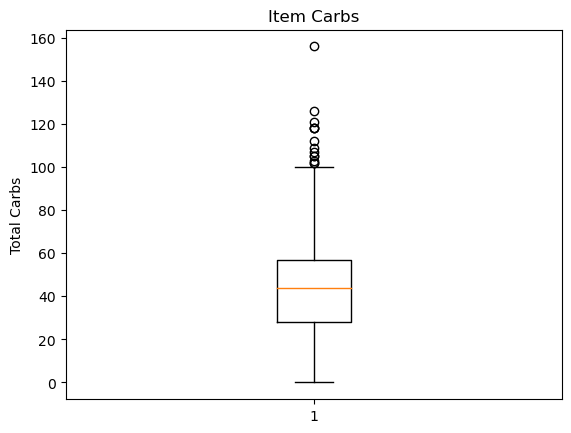

In [45]:
#look at the carbs of items

carb_box = fast_food_bin_df['total_carb']

fig1, ax1 = plt.subplots()
ax1.set_title('Item Carbs')
ax1.set_ylabel('Total Carbs')
ax1.boxplot(carb_box)
plt.show()

In [46]:
#look at the carb quartiles and print

quartiles = carb_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of carbs is: {lowerq}")
print(f"The upper quartile of carbs is: {upperq}")
print(f"The interquartile range of carbs is: {iqr}")
print(f"The the median of carbs is: {quartiles[0.5]} ")


#look at potential outliers and print
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of carbs is: 28.0
The upper quartile of carbs is: 57.0
The interquartile range of carbs is: 29.0
The the median of carbs is: 44.0 
Values below -15.5 could be outliers.
Values above 100.5 could be outliers.


In [47]:
# Find the minimum cholesterol value
min_cholesterol = fast_food_df['cholesterol'].min()

# Find the maximum cholesterol value
max_cholesterol = fast_food_df['cholesterol'].max()

print("The minimum cholesterol value is", min_cholesterol)
print("The maximum cholesterol value is", max_cholesterol)

The minimum cholesterol value is 0
The maximum cholesterol value is 805


In [48]:
fast_food_cholesterol_df = fast_food_df.copy()

# Cholesterol Bins Updated

# Bins to place values
bins = [0, 249, 499, 749, 999]

# Labels for each bin
group_labels = ["0 to 249", "250 to 499", "500 to 749", "750 to 999"]

# executing the data frame into bins
pd.cut(fast_food_cholesterol_df["cholesterol"], bins, labels=group_labels)

fast_food_cholesterol_df["cholesterol ranges"] = pd.cut(fast_food_cholesterol_df["cholesterol"], bins, labels=group_labels, include_lowest=True)
fast_food_cholesterol_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,cholesterol ranges
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,0 to 249
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False,0 to 249
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False,0 to 249
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False,0 to 249
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False,0 to 249


In [49]:
# How many food items fall into each created bins - 

# Groupby using cholesterol ranges
cholesterol_groups = fast_food_cholesterol_df.groupby('cholesterol ranges')

# Print the data
print(cholesterol_groups["cholesterol ranges"].count())

cholesterol ranges
0 to 249      503
250 to 499      7
500 to 749      0
750 to 999      1
Name: cholesterol ranges, dtype: int64


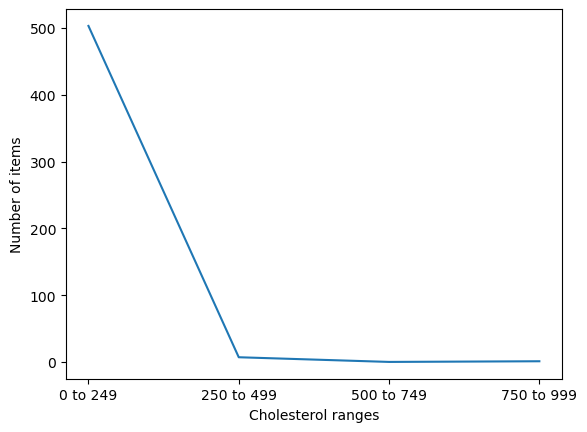

In [50]:
# show distribution of cholesterol range on a line graph


cholesterol_groups = pd.DataFrame({
    'cholesterol ranges': ['0 to 249', '250 to 499', '500 to 749', '750 to 999'],
    'number of items': [503, 7, 0, 1]
})

# Create a line graph
plt.plot(cholesterol_groups['cholesterol ranges'], cholesterol_groups['number of items'])

# Set the x-axis and y-axis labels
plt.xlabel('Cholesterol ranges')
plt.ylabel('Number of items')

# Show the plot
plt.show()

In [51]:
# Find highest and lowest sodium values

# Find the minimum cholesterol value
min_sodium = fast_food_df['sodium'].min()

# Find the maximum cholesterol value
max_sodium = fast_food_df['sodium'].max()

print("The minimum sodium value is", min_sodium)
print("The maximum sodium value is", max_sodium)

The minimum sodium value is 15
The maximum sodium value is 6080


In [52]:
#copy dataframe for sodium analysis

fast_food_sodium_df = fast_food_df.copy()

# Sodium Bins

# Bins to place values
bins = [0, 999, 1999, 2999, 3999, 4999, 5999, 6999]

# Labels for each bin
group_labels = ["0 to 999", "1000 to 1999", "2000 to 2999",  
                "3000 to 3999", "4000 to 4999", "5000 to 5999", 
               "6000 to 6999"]

# executing the data frame into bins
pd.cut(fast_food_sodium_df["sodium"], bins, labels=group_labels)

fast_food_sodium_df["sodium ranges"] = pd.cut(fast_food_sodium_df["sodium"], bins, labels=group_labels, include_lowest=True)
fast_food_sodium_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,sodium ranges
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,1000 to 1999
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False,1000 to 1999
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False,1000 to 1999
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False,1000 to 1999
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False,1000 to 1999


In [53]:
# How many food items fall into each created bins - 

# Groupby using cholesterol ranges
sodium_groups = fast_food_sodium_df.groupby('sodium ranges')

# Print the data
print(sodium_groups["sodium ranges"].count())

sodium ranges
0 to 999        203
1000 to 1999    251
2000 to 2999     45
3000 to 3999      9
4000 to 4999      2
5000 to 5999      0
6000 to 6999      1
Name: sodium ranges, dtype: int64


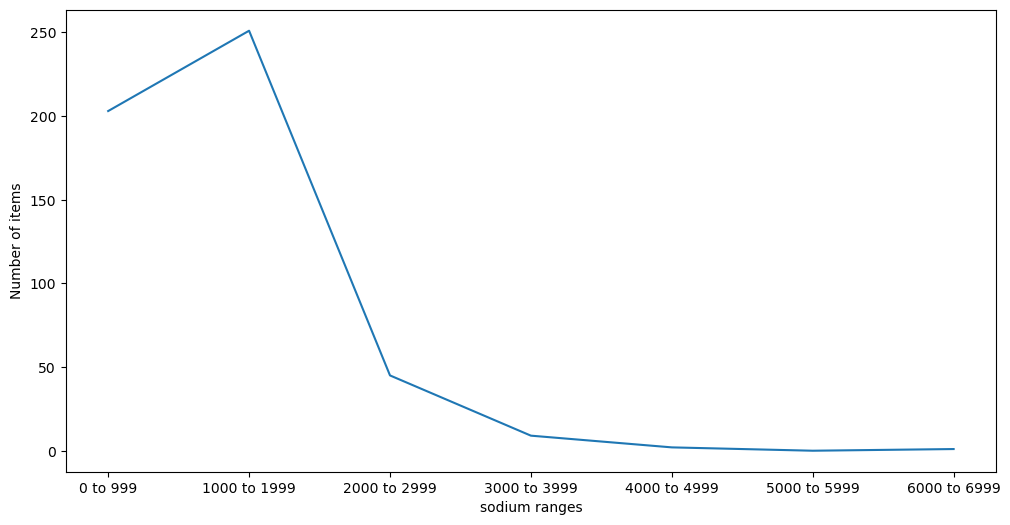

In [54]:
# show distribution of sodium range on a line graph


sodium_groups = pd.DataFrame({
    'sodium ranges': ["0 to 999", "1000 to 1999", "2000 to 2999",  
                "3000 to 3999", "4000 to 4999", "5000 to 5999", 
               "6000 to 6999"],
    'number of items': [203, 251, 45, 9, 2, 0, 1]
})

# Set the width of the plot
plt.figure(figsize=(12, 6))

# Create a line graph
plt.plot(sodium_groups['sodium ranges'], sodium_groups['number of items'])

# Set the x-axis and y-axis labels
plt.xlabel('sodium ranges')
plt.ylabel('Number of items')



# Show the plot
plt.show()

## Comparing Fast Food Restaurants to Cooking at Home
Below we analyze how different fast food restaurants stack up to cooking at home with accessible recipes online by using spoonaculars API to pull in a random recipe that is within a 5% range of the fast food items calorie count. Each recipe from spoonacular also includes protein, carbs, and fat content.

Spoonacular only allows 149 free API calls a day, so we cleaned our data to have a relatively even split of 6 fast food restaurants. Then a random spoonacular recipe within the calorie range was attached. 

Next, we ran a two tailed T-Test comparing the average for each fast food restaurant against the average from the random recipes for a given nutrient. The output is found in t_test_df. This gives a good look at which restaurants are comprable to random recipes for a given nutrient.

However, we wanted to look at which restaurants had statistically significant negative differences to random online recipes. To do this, we need to treat our nutrients differently in the T-Test because for protein we may want to understand which fast food restaurant is on average lower that random recipes whereas with carbs we would like to know which is higher on average that random recipes. The function nutrition_recipe_analysis() allows a user to input a restaurant, nutrient, and alternative hypothesis they would like to test in order to answer these questions.

***alpha = 0.05 for all T-Tests***

In [63]:
# Copy and Clean Data

# Take only data that is between 500 and 1000 calories
calorie_range_df = fast_food_df[(fast_food_df['calories'] >= 500) & (fast_food_df['calories'] < 1000)]

# Drop Chick Fil-A and Dairy Queen because it does not have enough values in range
calorie_range_df = calorie_range_df[(calorie_range_df['restaurant'] != 'Chick Fil-A') 
                                    & (calorie_range_df['restaurant'] != 'Dairy Queen')]

# Drop unnecessary columns
desired_cols = ['restaurant', 'item', 'calories', 'protein', 'total_fat', 'total_carb']
calorie_range_df = calorie_range_df[desired_cols]

# Drop any other rows that have a NaN value
calorie_range_df = calorie_range_df.dropna(how='any')

# Sort by calories descending and reset index
calorie_range_df = calorie_range_df.sort_values('calories', ascending=False).reset_index(drop=True)

calorie_range_df.head()

,restaurant,item,calories,protein,total_fat,total_carb
0,Burger King,Jalapeno King Sandwich,990,55.0,65,46
1,Burger King,DOUBLE WHOPPER w/ Cheese,990,52.0,65,53
2,Subway,Footlong Turkey Italiano Melt (with Provolone),980,48.0,48,94
3,Arbys,Ultimate BLT,980,43.0,55,80
4,Burger King,Sourdough King Double,970,55.0,61,52


In [64]:
# Loop through cleaned calorie_range_df for an equal distribution of restaurants up to 149 items (max daily API calls)

# Empty list to hold Series objects of loop
item_149 = []

# While we have less that 149 items, loop through each restaurant for new items until 149 is reached
while len(item_149) < 149:
    for restaurant in calorie_range_df['restaurant'].unique():
        if len(item_149) < 149:
            restaurant_df = calorie_range_df[calorie_range_df['restaurant'] == restaurant]
            item_149.append(restaurant_df.iloc[0])
            
            calorie_range_df = calorie_range_df.drop(restaurant_df.iloc[0].name)
            
recipe_comp_df = pd.DataFrame(item_149).reset_index(drop=True)
recipe_comp_df.head()

,restaurant,item,calories,protein,total_fat,total_carb
0,Burger King,Jalapeno King Sandwich,990,55.0,65,46
1,Subway,Footlong Turkey Italiano Melt (with Provolone),980,48.0,48,94
2,Arbys,Ultimate BLT,980,43.0,55,80
3,Sonic,3 Piece Super Crunch Chicken Strip Dinner,970,30.0,46,109
4,Mcdonalds,6 piece Sweet N' Spicy Honey BBQ Glazed Tenders,960,58.0,40,94


In [65]:
# Call the spoonacular API for a random recipe that has similar nutritional criteria
base_url = "https://api.spoonacular.com/recipes/findByNutrients"

# Set params so the API returns 1 random recipe
params = {
    "apiKey": api_key,
    "number": 1,
    "random": "true"
}

# Loop through recipe_comp_df and attach a recipe within the 5% calorie range

for index, row in recipe_comp_df.iterrows():
    # Generate search criteria
    min_cal = int(recipe_comp_df.loc[index,'calories'] * .95)
    max_cal = int(recipe_comp_df.loc[index,'calories'] * 1.05)
    
    # Create a minimum and maximum calorie range and add to params dictionary
    params['minCalories'] = min_cal
    params['maxCalories'] = max_cal
    
    # Make API request
    try:
        recipe = requests.get(base_url, params=params).json()
        time.sleep(1)
    except:
        print(f"API request error at index {index}.")
    
    # Attach recipe data to the DataFrame
    try:
        recipe_comp_df.loc[index, "recipe_name"] = recipe[0]['title']
        recipe_comp_df.loc[index, "recipe_calories"] = recipe[0]['calories']
        recipe_comp_df.loc[index, "recipe_protein"] = int(recipe[0]['protein'].replace('g',''))
        recipe_comp_df.loc[index, "recipe_fat"] = int(recipe[0]['fat'].replace('g',''))
        recipe_comp_df.loc[index, "recipe_carb"] = int(recipe[0]['carbs'].replace('g',''))
        recipe_comp_df.loc[index, "recipe_image"] = recipe[0]['image']
    except:
        print(f"Recipe criteria not found for {row['restaurant']}.")
        
recipe_comp_df.head()

,restaurant,item,calories,protein,total_fat,total_carb,recipe_name,recipe_calories,recipe_protein,recipe_fat,recipe_carb,recipe_image
0,Burger King,Jalapeno King Sandwich,990,55.0,65,46,Coulibiac Of Salmon,958.0,29.0,58.0,71.0,https://spoonacular.com/recipeImages/640190-31...
1,Subway,Footlong Turkey Italiano Melt (with Provolone),980,48.0,48,94,Ginger-Garlic and Lime Chicken Thighs with Esc...,938.0,52.0,74.0,11.0,https://spoonacular.com/recipeImages/1095827-3...
2,Arbys,Ultimate BLT,980,43.0,55,80,Creamy zucchini and ham pasta,1001.0,33.0,60.0,77.0,https://spoonacular.com/recipeImages/668492-31...
3,Sonic,3 Piece Super Crunch Chicken Strip Dinner,970,30.0,46,109,Light and Tasty Tomato Basil Mozzarella Pasta ...,954.0,33.0,41.0,107.0,https://spoonacular.com/recipeImages/1697625-3...
4,Mcdonalds,6 piece Sweet N' Spicy Honey BBQ Glazed Tenders,960,58.0,40,94,Extra Large Homemade Meatballs w Pasta,933.0,53.0,58.0,43.0,https://spoonacular.com/recipeImages/642502-31...


In [66]:
# Save the combined fast food and random recipe DataFrame as a csv
recipe_comp_df.to_csv('Resources/recipe_comp.csv')

In [67]:
# Create a two-tailed T-Test analyzing each restaurant's nutrient against random recipes

# Create a dictionary that we will convert to a DataFrame once loop complete
restaurant_list = recipe_comp_df['restaurant'].unique()
t_test_dict = {
    'restaurant': restaurant_list,
    'protein': [],
    'fat': [],
    'carb': []
}

# Loop through each restaurant and run T-Test for each nutrient type
for restaurant in restaurant_list:
    
    # Isolate the restaurant within the DataFrame
    rest_df = recipe_comp_df[recipe_comp_df['restaurant'] == restaurant]
    
    # Run T-Test for each nutrient
    for nutrient in ['protein', 'fat', 'carb']:
        if nutrient == 'protein':
            ff_col = nutrient
        else:
            ff_col = 'total_' + nutrient
            
        recipe_col = 'recipe_' + nutrient
        
        # Save a variable for the fast food and recipe sample
        ff_sample = rest_df[ff_col]
        recipe_sample = rest_df[recipe_col]
        
        # Run T-Test and save p-value
        nutrient_p = st.ttest_ind(ff_sample, recipe_sample, equal_var=False)[1]
        
        # Add the p-value to the appropriate list in the dictionary
        t_test_dict[nutrient].append(nutrient_p)
        
# Create a DataFrame from the dictionary containing the results of the two-tailed T-Tests
t_test_df = pd.DataFrame(t_test_dict).set_index('restaurant', drop=True)
t_test_df

,protein,fat,carb
restaurant,,,
Burger King,0.101183,0.339659,0.100609
Subway,0.026163,0.000048,0.000001
Arbys,0.050266,0.797577,0.814506
Sonic,0.201896,0.548617,0.595699
Mcdonalds,0.075570,0.139941,0.173462
Taco Bell,0.765563,0.006044,0.004704


Above we can see p-values from all the restaurants when comparing their average of a given nutrient to the random recipe. At a high level, it's clear that only Subway has statistically significant differences in averages across all three nutrient we compared. To understand those relationships in more depth, we need to use the tool below to drill deeper.

In [ ]:
# Create a function that allows the user to customize inputs

def nutrition_recipe_analysis(df):
    # Print input options for restaurant
    print("Restaurant Options")
    print('-'*20)
    print("1 - Burger King")
    print("2 - Subway")
    print("3 - Arbys")
    print("4 - Sonic")
    print("5 - Mcdonalds")
    print("6 - Taco Bell")
    print('-'*20)
    
    # Gather and convert restaurant input with error handling
    rest_pick = 0
    while rest_pick not in range(1,7):
        try:
            rest_pick = int(input("Enter the number for the restaurant you'd like to view: "))
            if rest_pick not in range(1,7):
                rest_pick = int(input("Entry is out of range. Please try again: "))
        except:
            rest_pick = int(input("Entry is not an integer. Please try again: "))
        
        
    if rest_pick == 1:
        restaurant = 'Burger King'
    elif rest_pick == 2:
        restaurant = 'Subway'
    elif rest_pick == 3:
        restaurant = 'Arbys'
    elif rest_pick == 4:
        restaurant = 'Sonic'
    elif rest_pick == 5:
        restaurant = 'Mcdonalds'
    elif rest_pick == 6:
        restaurant = 'Taco Bell'
    
    print(f'You chose: {restaurant.upper()}')
    print('')
        
    # Create a DataFrame for only the selected restaurant
    df = df[df['restaurant'] == restaurant]
    
    # Print options for nutrient
    print("Nutrient Options")
    print('-'*20)
    print("1 - protein")
    print("2 - fat")
    print("3 - carb")
    print('-'*20)
    
    # Gather and convert nutrient input with error handling
    nut_pick = 0
    while nut_pick not in range(1,4):
        try:
            nut_pick = int(input("Enter the number for the nutrient you'd like to view: "))
            if nut_pick not in range(1,4):
                nut_pick = int(input("Entry is out of range. Please try again: "))
        except:
            nut_pick = int(input("Entry is not an integer. Please try again: "))
    
    # Assign columns based on 
    if nut_pick == 1:
        nutrient = 'protein'
    elif nut_pick == 2:
        nutrient = 'fat'
    elif nut_pick == 3:
        nutrient = "carb"
    # Handle protien column differently than others
    if nutrient == 'protein':
        ff_col = nutrient
    else:
        ff_col = 'total_' + nutrient
        
    recipe_col = 'recipe_' + nutrient
    
    print(f"you chose: {nutrient.upper()}")
    print('')
    
    # Print input options for restaurant
    print("T-Test Alternative Hypothesis Options")
    print('-'*20)
    print(f"1 - {restaurant}'s average {nutrient} is GREATER THAN the average {nutrient} from random recipes with similar calories.")
    print(f"2 - {restaurant}'s average {nutrient} is LESS THAN the average {nutrient} from random recipes with similar calories.")
    print(f"3 - {restaurant}'s average {nutrient} is NOT EQUAL TO the average {nutrient} from random recipes with similar calories.")
    print('-'*20)
    
    # Gather and convert T-Test input with error handling
    t_pick = 0
    while t_pick not in range(1,4):
        try:
            t_pick = int(input("Enter the number for the T-Test you'd like to view: "))
            if t_pick not in range(1,4):
                t_pick = int(input("Entry is out of range. Please try again: "))
        except:
            t_pick = int(input("Entry is not an integer. Please try again: "))
        
    if t_pick == 1:
        alt = 'greater'
    elif t_pick == 2:
        alt = 'less'
    elif t_pick == 3:
        alt = 'two-sided'
    
    print(f"you chose: {alt.upper()}")
    print('')
    
    # Run T-Test based on inputs and save p-value
    p_val = st.ttest_ind(df[ff_col], df[recipe_col], equal_var=False, alternative=alt)[1]
    
    # Display averages, alpha, and p-value from T-Test
    print("T-Test Output")
    print('-'*20)
    print(f"{restaurant} average {nutrient}: {df[ff_col].mean()}")
    print(f"Random recipe average {nutrient}: {df[recipe_col].mean()}")
    print(f"alpha: 0.05")
    print(f"p-value: {p_val}")
    print('-'*20)
    
    # Pring null hypothesis outcome
    if p_val < .05:
        print("REJECT THE NULL HYPOTHESIS")
    else: 
        print('FAIL TO REJECT THE NULL HYPOTHESIS')
        
    # Create the plot     
    bins = range(0, 100, 10)
    plt.hist(df[ff_col], bins, alpha=.5, label=restaurant)
    plt.hist(df[recipe_col], bins, alpha=.5, label='Recipe')
    plt.title(f"{nutrient.title()} Histogram ({restaurant} and Random Recipe)")
    plt.xlabel(f"{nutrient.title()} (grams)")
    plt.ylabel('Frequency')
    plt.xticks(bins)
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Create script to run analysis until use it satisfied
analysis = 'yes'
while analysis == 'yes':
    nutrition_recipe_analysis(recipe_comp_df)
    analysis = input("Enter 'yes' if you'd like to run another nutrition analysis: ").lower()